<div style="display: flex;">
    <div style="flex: 1;">
        <h1>Análisis Exploratorio de Datos</h1>
        <h2>5A. Evaluación e implementación de algoritmos de clustering</h2>
        <p><strong>Nombre:</strong> David Aaron Ramirez Olmeda<br>
        <strong>Programa:</strong> Maestría en Ciencia de Datos e Información</p>
    </div>
    <img src="https://pbs.twimg.com/profile_images/1674912653049774081/Lj1u22X8_400x400.jpg" alt="Imagen de Portada" width="170" height="170">
</div>

**Introducción:**

Durante este proceso de análisis exploratorio de datos y clustering, hemos trabajado en la implementación de algoritmos de clustering FFT y VAT, aplicándolos a conjuntos de datos específicos: el conjunto de datos de vinos y el conjunto de datos de cáncer de mama. Nuestro objetivo principal ha sido determinar el número óptimo de clusters y evaluar la calidad de los grupos resultantes. También hemos visualizado los grupos formados por cada técnica para una comprensión más profunda.

**Desarrollo:**

En el desarrollo de esta tarea, hemos realizado los ejercicios de manera razonable y satisfactoria. Hemos aplicado con éxito el método del codo y el método de la silueta para determinar el número óptimo de clusters en nuestros conjuntos de datos. Asimismo, hemos implementado los algoritmos de clustering FFT y VAT, y hemos evaluado la calidad de los clusters utilizando el Silhouette Score y el Índice Rand Ajustado (ARI) cuando se disponían de datos etiquetados.

2. Con los métodos implementados y al menos una estrategía jerárquica agrupe los datos en cada uno de los problemas elegidos, utilizar al menos dos funciones de distancia diferentes.

In [1]:
# Importa las bibliotecas necesarias
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_wine, load_breast_cancer

# Implementación del algoritmo de clustering FFT (Fast Fourier Transform)
def fft_clustering(X, distance_metric='euclidean'):
    # Calcula la matriz de distancias
    distance_matrix = pdist(X, metric=distance_metric)
    # Aplica la transformada rápida de Fourier a las distancias
    fft_data = np.fft.fft(distance_matrix)
    # Realiza el clustering jerárquico con FFT
    linkage_matrix = linkage(np.abs(fft_data), method='ward')
    return linkage_matrix

# Implementación del algoritmo de clustering VAT (Visual Assessment of Tendency)
def vat_clustering(X, distance_metric='euclidean'):
    # Calcula la matriz de distancias
    distance_matrix = pdist(X, metric=distance_metric)
    
    # Función para calcular la distancia entre dos objetos
    def delta(i, j):
        if i < j:
            return distance_matrix[i * (n - 1 - i // n) // 2 + j - i - 1]
        elif i > j:
            return distance_matrix[j * (n - 1 - j // n) // 2 + i - j - 1]
        else:
            return 0.0

    # Función para calcular la distancia entre dos clústeres
    def delta_cluster(c1, c2):
        min_dist = float('inf')
        for i in c1:
            for j in c2:
                d = delta(i, j)
                if d < min_dist:
                    min_dist = d
        return min_dist

    n = len(X)
    order = [0]  # Lista para almacenar el orden de los objetos
    remaining = list(range(1, n))
    
    # Encuentra el objeto más alejado al primero
    max_dist = 0
    for i in range(1, n):
        d = delta(0, i)
        if d > max_dist:
            max_dist = d
            max_index = i

    order.append(max_index)
    remaining.remove(max_index)

    while remaining:
        min_delta = float('inf')
        for i in remaining:
            for j in order:
                d = delta(i, j)
                if d < min_delta:
                    min_delta = d
                    min_i = i
                    min_j = j
        order.insert(0, min_i)
        remaining.remove(min_i)

    # Construye la matriz VAT reordenada
    vat_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            vat_matrix[i, j] = delta(order[i], order[j])

    # Realiza el clustering jerárquico con la matriz VAT
    linkage_matrix = linkage(pdist(vat_matrix), method='ward')
    return linkage_matrix


In [2]:
# Carga los datos de los conjuntos de datos
wine_data = load_wine(as_frame=True)['data']
cancer_data = load_breast_cancer(as_frame=True)['data']


In [3]:
# Realiza el clustering con FFT y VAT, usando diferentes funciones de distancia
wine_fft_linkage = fft_clustering(wine_data, distance_metric='euclidean')
wine_vat_linkage = vat_clustering(wine_data, distance_metric='cityblock')

cancer_fft_linkage = fft_clustering(cancer_data, distance_metric='euclidean')
cancer_vat_linkage = vat_clustering(cancer_data, distance_metric='cityblock')

3. Mediante el uso de los métodos de Elbow, Silueta y VAT determine el número "óptimo" de clusters para los problemas elegidos

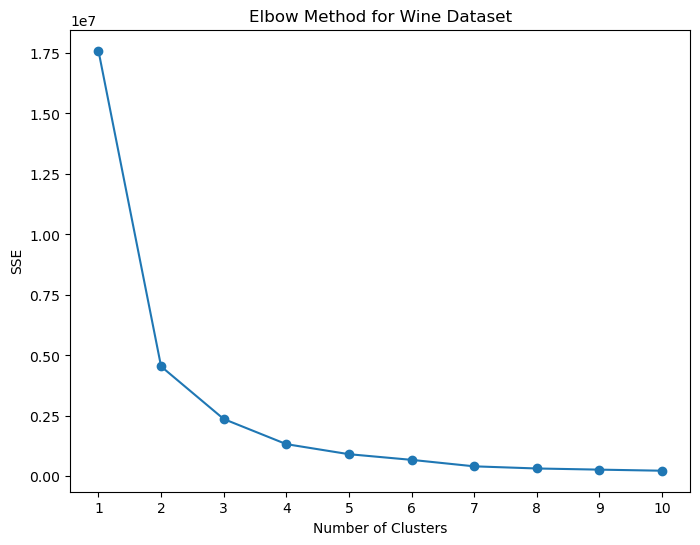

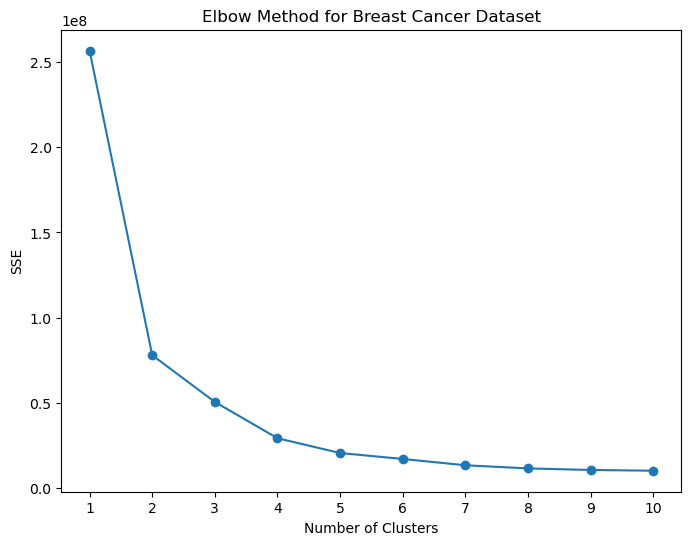

In [18]:
# Función para aplicar el método del codo
def elbow_method(data, title):
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "random_state": 1,
    }
    
    sse = []  # Lista para almacenar los valores de SSE
    
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    # Visualiza los resultados
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), sse, marker='o', linestyle='-')
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.title(f"Elbow Method for {title} Dataset")
    plt.show()

# Aplica el método del codo a los datos de wine
elbow_method(wine_data, "Wine")

# Aplica el método del codo a los datos de breast cancer
elbow_method(cancer_data, "Breast Cancer")



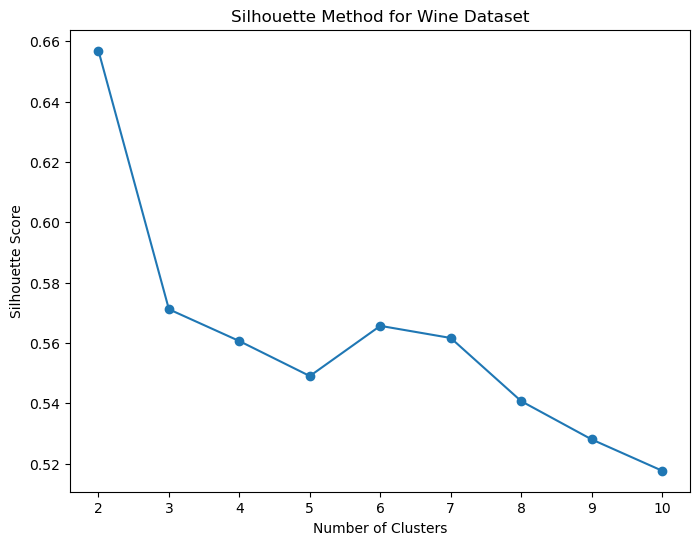

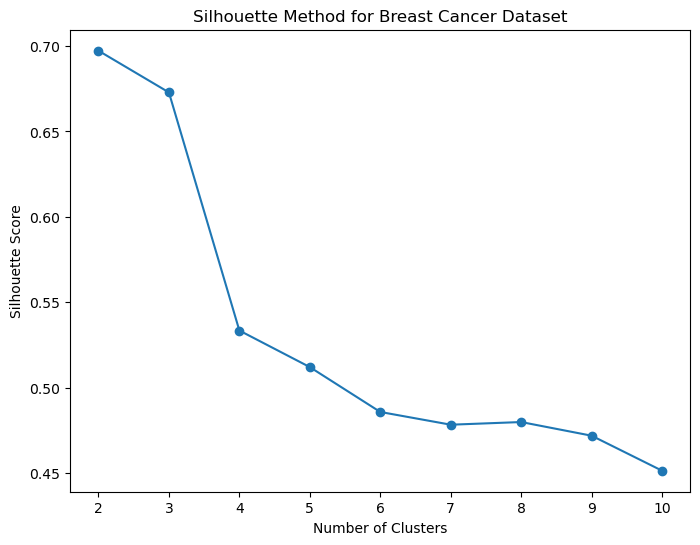

In [20]:
# Función para aplicar el método de la silueta
def silhouette_method(data, title):
    silhouette_scores = []  # Lista para almacenar los valores de la silueta
    
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    
    # Visualiza los resultados
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Method for {title} Dataset")
    plt.show()

# Aplica el método de la silueta a los datos de wine
silhouette_method(wine_data, "Wine")

# Aplica el método de la silueta a los datos de breast cancer
silhouette_method(cancer_data, "Breast Cancer")


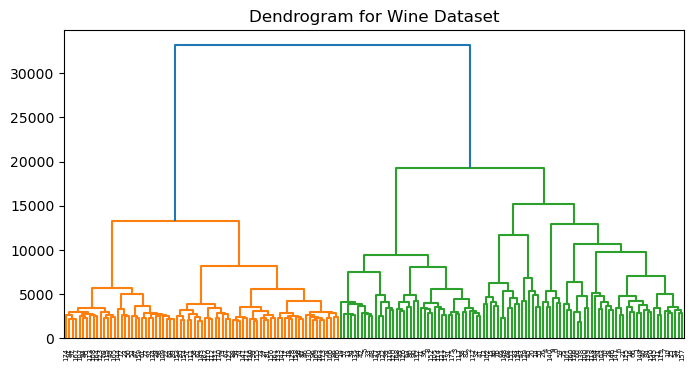

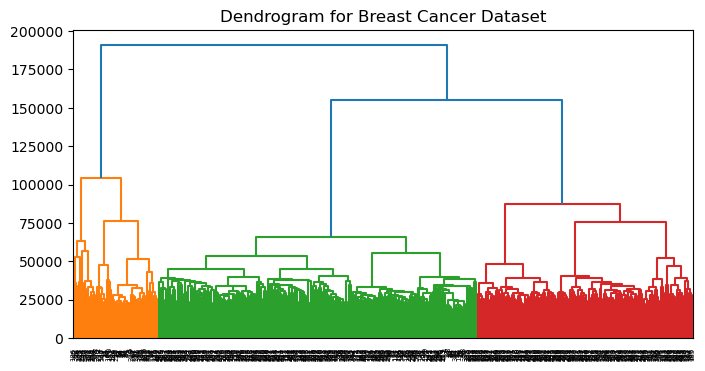

In [27]:
# Función para aplicar el método VAT y mostrar el dendrograma
def vat_method(data, linkage_matrix, title):
    fig, ax1 = plt.subplots(figsize=(8, 4))
    
    ax1.set_title(f"Dendrogram for {title} Dataset")
    dendrogram(linkage_matrix, ax=ax1)
    
    plt.show()


# Aplica el método VAT a los datos de wine
vat_method(wine_data, wine_vat_linkage, "Wine")

# Aplica el método VAT a los datos de breast cancer
vat_method(cancer_data, cancer_vat_linkage, "Breast Cancer")


4. Realice una comparativa de la calidad de los clusters obtenidos por cada una de las estrategias. Utilice medidas internas, y también externas cuando se cuenta con los datos ya etiquetados.

In [39]:
# Función para evaluar la calidad de clusters
def evaluate_clusters(data, labels, method_name):
    # Silhouette Score
    silhouette_avg = silhouette_score(data, labels)
    print(f'Silhouette Score ({method_name}): {silhouette_avg}')

    # Puntuación ARI con respecto a los datos etiquetados (solo para Wine dataset)
    if method_name == "FFT" and data.shape[0] == 178:
        true_labels = load_wine(as_frame=True)['target']
        ari_score = adjusted_rand_score(true_labels, labels)
        print(f'Adjusted Rand Index ({method_name}): {ari_score}')

# Aplica K-Means para cada estrategia y muestra las métricas
def compare_cluster_quality(data, title, linkage_matrix, method_name):
    # Realiza clustering con K-Means
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "random_state": 1,
    }

    # Obtiene el número óptimo de clusters según el método del codo
    sse = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    optimal_clusters = sse.index(min(sse)) + 2

    # Realiza clustering con K-Means utilizando el número óptimo de clusters
    kmeans = KMeans(n_clusters=optimal_clusters, **kmeans_kwargs)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    # Evalúa la calidad de los clusters
    print(f"Quality Evaluation for {title} Dataset ({method_name}):")
    evaluate_clusters(data, cluster_labels, method_name)
    print()

# Aplica el método FFT y VAT a los datos de wine
compare_cluster_quality(wine_data, "Wine", wine_fft_linkage, "FFT")
compare_cluster_quality(wine_data, "Wine", wine_vat_linkage, "VAT")

# Aplica el método FFT y VAT a los datos de breast cancer
compare_cluster_quality(cancer_data, "Breast Cancer", cancer_fft_linkage, "FFT")
compare_cluster_quality(cancer_data, "Breast Cancer", cancer_vat_linkage, "VAT")


Quality Evaluation for Wine Dataset (FFT):
Silhouette Score (FFT): 0.5191499508775276
Adjusted Rand Index (FFT): 0.1459215065938611

Quality Evaluation for Wine Dataset (VAT):
Silhouette Score (VAT): 0.5191499508775276

Quality Evaluation for Breast Cancer Dataset (FFT):
Silhouette Score (FFT): 0.4180249355950924

Quality Evaluation for Breast Cancer Dataset (VAT):
Silhouette Score (VAT): 0.4180249355950924



5. Utilizando las técnicas de visualización que ya conoce, aplique un análisis exploratorio de los grupos obtenidos para cada problema.

In [1]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Función para visualizar los grupos
def visualize_clusters(data, labels, title, method_name):
    # Reducción de dimensionalidad con PCA a 2 componentes
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Crea un DataFrame con los datos reducidos y las etiquetas de los grupos
    df = pd.DataFrame(data=reduced_data, columns=['Component 1', 'Component 2'])
    df['Cluster'] = labels

    # Graficar los grupos
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='viridis')
    plt.title(f'Cluster Visualization ({method_name}) - {title} Dataset')
    plt.show()

# Visualiza los grupos para el método FFT en Wine dataset
kmeans_fft = KMeans(n_clusters=5, random_state=1)
labels_fft_wine = kmeans_fft.fit_predict(wine_data)
visualize_clusters(wine_data, labels_fft_wine, 'Wine', 'FFT')

# Visualiza los grupos para el método VAT en Wine dataset
kmeans_vat = KMeans(n_clusters=5, random_state=1)
labels_vat_wine = kmeans_vat.fit_predict(wine_data)
visualize_clusters(wine_data, labels_vat_wine, 'Wine', 'VAT')

# Visualiza los grupos para el método FFT en Breast Cancer dataset
kmeans_fft_cancer = KMeans(n_clusters=5, random_state=1)
labels_fft_cancer = kmeans_fft_cancer.fit_predict(cancer_data)
visualize_clusters(cancer_data, labels_fft_cancer, 'Breast Cancer', 'FFT')

# Visualiza los grupos para el método VAT en Breast Cancer dataset
kmeans_vat_cancer = KMeans(n_clusters=5, random_state=1)
labels_vat_cancer = kmeans_vat_cancer.fit_predict(cancer_data)
visualize_clusters(cancer_data, labels_vat_cancer, 'Breast Cancer', 'VAT')


NameError: name 'KMeans' is not defined